# Car Price Prediction---Regression

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:\\Users\\ranik\\Downloads\\Car-details-v3.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
data.dropna(axis=0,inplace = True)
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [6]:
data.drop(['name','torque'],axis=1,inplace=True)
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [7]:
data['mileage'].replace('kmpl','',regex=True,inplace=True)
data['engine'].replace('CC','',regex=True,inplace=True)
data['max_power'].replace('bhp','',regex=True,inplace=True)
data.replace('km/kg','',regex=True,inplace=True)
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0


In [8]:
data['seller_type'].unique()


array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder 

le = LabelEncoder()

data['transmission'] = le.fit_transform(data['transmission'])

ode = OrdinalEncoder()

data['owner'] = ode.fit_transform(data[['owner']])
data['seller_type'] = ode.fit_transform(data[['seller_type']])
data['fuel'] = ode.fit_transform(data[['fuel']])

In [11]:
data['transmission'].unique()

array([1, 0])

In [12]:
data['owner'].unique()

array([0., 2., 4., 1., 3.])

In [13]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,1.0,1.0,1,0.0,23.4,1248,74,5.0
1,2014,370000,120000,1.0,1.0,1,2.0,21.14,1498,103.52,5.0
2,2006,158000,140000,3.0,1.0,1,4.0,17.7,1497,78,5.0
3,2010,225000,127000,1.0,1.0,1,0.0,23.0,1396,90,5.0
4,2007,130000,120000,3.0,1.0,1,0.0,16.1,1298,88.2,5.0


In [14]:
data = data.astype({'fuel':'int',
                    'selling_price':'int',
                    'km_driven':'int',
                    'seller_type':'float',
                    'year':'float',
                    'transmission':'float',
                    'owner':'float',
                    'mileage':'float',
                    'engine':'int',
                    'max_power':'float',
                    'seats':'float'})

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   float64
 1   selling_price  7906 non-null   int32  
 2   km_driven      7906 non-null   int32  
 3   fuel           7906 non-null   int32  
 4   seller_type    7906 non-null   float64
 5   transmission   7906 non-null   float64
 6   owner          7906 non-null   float64
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   int32  
 9   max_power      7906 non-null   float64
 10  seats          7906 non-null   float64
dtypes: float64(7), int32(4)
memory usage: 617.7 KB


In [16]:
df=pd.DataFrame(data)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014.0,450000,145500,1,1.0,1.0,0.0,23.40,1248,74.00,5.0
1,2014.0,370000,120000,1,1.0,1.0,2.0,21.14,1498,103.52,5.0
2,2006.0,158000,140000,3,1.0,1.0,4.0,17.70,1497,78.00,5.0
3,2010.0,225000,127000,1,1.0,1.0,0.0,23.00,1396,90.00,5.0
4,2007.0,130000,120000,3,1.0,1.0,0.0,16.10,1298,88.20,5.0


In [17]:
x = df.drop(['selling_price'],axis=1)
y = df['selling_price']

<Axes: >

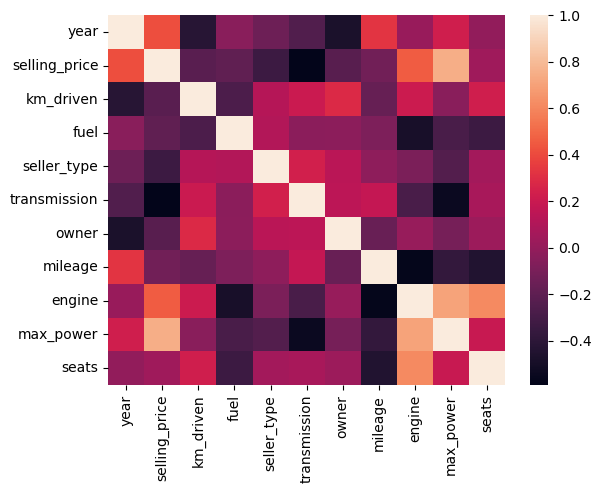

In [18]:
sns.heatmap(df.corr())

C:\Users\ranik\AppData\Local\Temp\ipykernel_3280\366723279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])


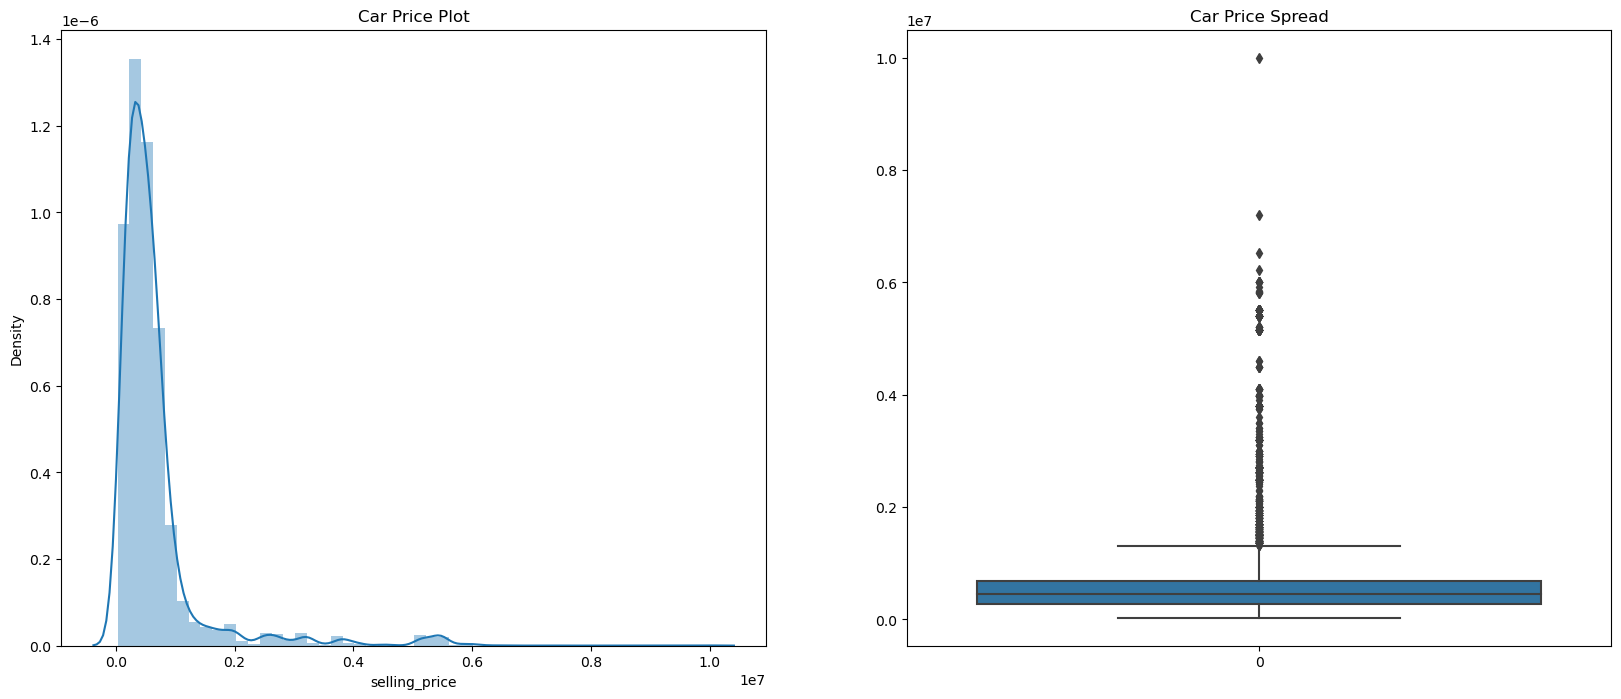

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Plot')
sns.distplot(df['selling_price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(df['selling_price'])

plt.show()

In [52]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
3064,2006.0,62900,3,1.0,1.0,0.0,18.90,998,67.10,5.0
2522,2013.0,95000,1,1.0,1.0,0.0,20.46,1461,83.80,5.0
1819,2017.0,38000,3,1.0,1.0,0.0,23.01,999,67.00,5.0
6600,2015.0,70000,1,1.0,1.0,4.0,15.40,2179,120.00,7.0
7909,2018.0,9500,1,1.0,1.0,0.0,21.50,1497,108.50,5.0
...,...,...,...,...,...,...,...,...,...,...
5374,2019.0,5000,3,1.0,1.0,0.0,21.40,1197,83.10,5.0
5544,2016.0,60000,3,1.0,1.0,2.0,18.50,1198,86.80,5.0
888,2003.0,90000,3,1.0,1.0,2.0,13.20,1495,94.00,5.0
7820,2012.0,155000,1,1.0,0.0,2.0,16.07,1995,181.00,4.0


In [55]:
#from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
#lr = LinearRegression()
lr = RandomForestRegressor(n_estimators= 10)
lr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [56]:
y_test_pred = lr.predict(x_test)
y_test_pred

array([ 555000.        ,  506333.23333333,  177200.        , ...,
        242999.9       , 2680535.50266237,  582000.        ])

In [57]:
from sklearn.metrics import r2_score , mean_squared_error , classification_report
r2_score(y_test_pred,y_test)

0.9780524985207426

In [58]:
r2_score(y_train,lr.predict(x_train))

0.991918435959454

In [59]:
import math
mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print('Accuracy for Random Forest',100*max(0,rmse))

Accuracy for Random Forest 12233035.01656886


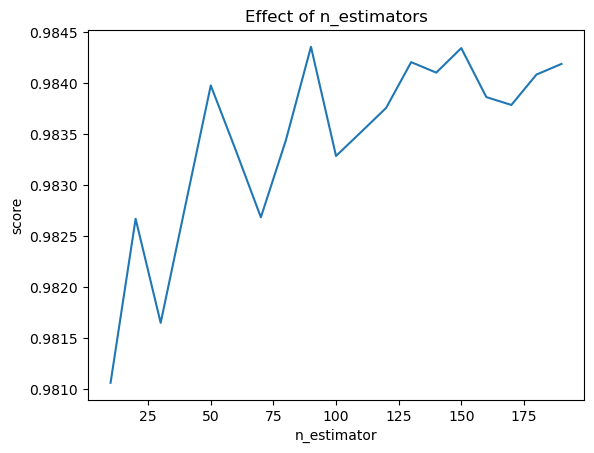

In [60]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    lr.set_params(n_estimators=n)
    lr.fit(x_train, y_train)
    scores.append(lr.score(x_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [61]:
scores

[0.9810622500330708,
 0.9826713664711951,
 0.9816501812628133,
 0.982817854953734,
 0.9839793517475198,
 0.9833420749429577,
 0.9826855663816004,
 0.9834434401431797,
 0.9843584518318991,
 0.9832871177964537,
 0.9835219611088913,
 0.9837588297725421,
 0.9842077653338225,
 0.9841048901870562,
 0.9843453008003697,
 0.9838650541274849,
 0.9837876399210099,
 0.9840856230492486,
 0.9841905090995448]